In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,1,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,1,1
3,spring-cloud-alibaba,infrastructure management,1,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,1,0


In [7]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

mybatis        248
Hibernate      205
JPA             68
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

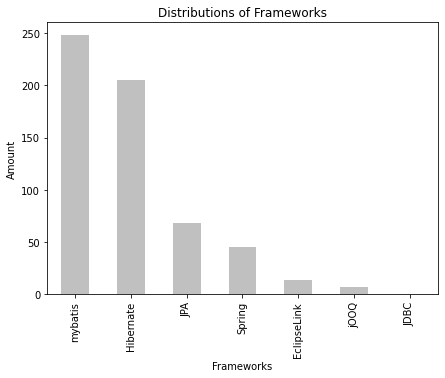

In [11]:
plt.figure(figsize=(7,5))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount")
plt.show() 

In [12]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()

,Projects,First-Level,Second-Level,Total
0,Activiti,76,200,276
1,che,118,282,400
2,pinpoint,19,17,36
3,skywalking,2,6,8
4,storm,6,7,13


<AxesSubplot:xlabel='Projects'>

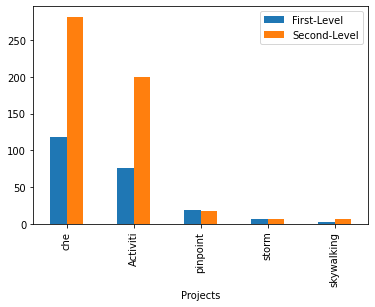

In [45]:
df = df.iloc[: , :].sort_values(by='Total', ascending=False)
fig, ax = plt.subplots()
df.iloc[: , :3].plot.bar(x='Projects', ax=ax)